# Seismicity Analysis in Iran (2010–2025)

**Introduction**

Iran is situated along one of the most seismically active regions in the world, where the Arabian tectonic plate converges with the Eurasian plate.
This ongoing collision has shaped Iran’s complex geology, producing numerous faults and seismic zones, particularly in regions such as the Zagros Mountains and Alborz ranges.
As a result, Iran experiences frequent and sometimes devastating earthquakes, impacting millions of people and critical infrastructure. In addition to natural tectonic forces, anthropogenic activities like reservoir impoundment and mining have also been linked to induced seismicity in parts of Iran. Understanding the patterns of earthquake occurrence — spatially, temporally, and in terms of magnitude — is vital for seismic hazard assessment and risk mitigation efforts.
Iran’s unique tectonic setting leads to a wide range of earthquake characteristics, from shallow crustal events to deeper seismicity, with magnitudes varying from small microearthquakes to major destructive events exceeding magnitude 7.
This diversity necessitates detailed monitoring and analysis to unravel seismic source behavior and improve forecasting models. In this analysis, we explore the earthquake data recorded in Iran from 2010 through 2025. Using comprehensive earthquake catalogs compiled from national and international sources, we investigate the distribution of events, their magnitudes, and temporal trends. By combining spatial plotting, density mapping, and magnitude-frequency statistics, we aim to identify seismic clusters, fault zone activity, and temporal variations in earthquake occurrence. The study also examines correlations between seismicity and geological structures, as well as the implications of observed trends for earthquake hazard assessment. By better understanding these seismic patterns, we hope to support efforts to enhance earthquake preparedness, inform urban planning, and reduce risk to vulnerable communities.

This work demonstrates how modern data visualization and analysis techniques can provide meaningful insights into complex tectonic regions such as Iran, where seismic hazard remains a critical public safety concern.




This code snippet is designed to programmatically download and organize earthquake event data for Iran, covering the period from 2010 to 2025. The main goal is to query a comprehensive earthquake catalog hosted by IRIS (Incorporated Research Institutions for Seismology), filter the data geographically and temporally, and save the results in a structured format (CSV) for further analysis.

#### 1. **Importing Necessary Libraries**

* **ObsPy** (`UTCDateTime` and `Client`): A powerful Python library for seismology that allows easy access to earthquake data from many sources via FDSN web services.
* **Pandas**: For tabular data management and manipulation.
* **Datetime and Timedelta**: To handle and iterate over specific time ranges.
* **NumPy**: For numerical operations and handling missing data.

#### 2. **Initializing the Data Client**

```python
client = Client("IRIS")
```

* This initializes a connection to the IRIS data center’s web service.
* IRIS provides a vast, authoritative global earthquake catalog accessible through the FDSN (International Federation of Digital Seismograph Networks) interface.

#### 3. **Defining the Geographic Region of Interest**

```python
min_lat, max_lat = 20.0, 42.0
min_lon, max_lon = 40.0, 68.0
```

* These coordinates roughly define a bounding box covering the country of Iran.
* Events outside these latitude and longitude limits will be excluded from the query results.

#### 4. **Setting the Time Range and Fetching Strategy**

```python
start_date = datetime(2010, 1, 1)
end_date = datetime(2025, 1, 1)
delta = timedelta(days=30)  # fetch data in ~1 month chunks
```

* The analysis covers 15 years of seismic activity.
* Data is fetched in monthly intervals to manage large query sizes and reduce the risk of timeouts or server errors during requests.

#### 5. **Iterative Data Fetching Loop**

```python
current_start = start_date
while current_start < end_date:
    current_end = current_start + delta
    if current_end > end_date:
        current_end = end_date
    
    try:
        catalog = client.get_events(
            starttime=UTCDateTime(current_start),
            endtime=UTCDateTime(current_end),
            minlatitude=min_lat, maxlatitude=max_lat,
            minlongitude=min_lon, maxlongitude=max_lon,
            minmagnitude=2.0
        )
        all_events.extend(catalog)
        print(f"Fetched {len(catalog)} events from {current_start.date()} to {current_end.date()}")
    except Exception as e:
        print(f"Error fetching {current_start.date()} to {current_end.date()}: {e}")
    
    current_start = current_end
```

* This loop breaks the total date range into manageable 30-day chunks.
* For each chunk, the `get_events()` method requests earthquake events:

  * Occurring within the time window.
  * Located inside the specified lat/lon bounding box.
  * Having a minimum magnitude of 2.0 to avoid excessive noise from very small, often less reliably recorded events.
* The retrieved catalog of events for each period is appended to `all_events`.
* Exception handling is included to gracefully catch and report any errors during fetching (such as connection issues).

#### 6. **Extracting Relevant Event Information**

```python
events_data = []
for event in all_events:
    origin = event.origins[0]
    magnitude = event.magnitudes[0]
    
    depth = origin.depth / 1000 if origin.depth is not None else np.nan  # handle None
    
    events_data.append({
        "time": origin.time.datetime,
        "latitude": origin.latitude,
        "longitude": origin.longitude,
        "depth_km": depth,
        "magnitude": magnitude.mag
    })
```

* Each event in the combined list may contain multiple origins or magnitudes; here, the first (primary) origin and magnitude are used.
* Depth is converted from meters (the units in the catalog) to kilometers.
* Missing depth values are safely handled by replacing `None` with `NaN`.
* Relevant data fields (time, location, depth, magnitude) are collected into a dictionary and appended to a list.

#### 7. **Creating a Pandas DataFrame and Saving to CSV**

```python
df = pd.DataFrame(events_data)
df.to_csv("iran_earthquakes.csv", index=False)
print(f"Total events collected: {len(df)}")
```

* The list of dictionaries is converted to a Pandas DataFrame for easy data manipulation and analysis.
* The DataFrame is saved as a CSV file named `"iran_earthquakes.csv"`.
* A summary print statement shows the total number of events collected.




In [33]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

# Initialize client
client = Client("IRIS")

# Iran bounding box
min_lat, max_lat = 20.0, 42.0
min_lon, max_lon = 40.0, 68.0

all_events = []

# Time range
start_date = datetime(2010, 1, 1)
end_date = datetime(2025, 1, 1)
delta = timedelta(days=30)  # fetch data in ~1 month chunks

current_start = start_date
while current_start < end_date:
    current_end = current_start + delta
    if current_end > end_date:
        current_end = end_date
    
    try:
        catalog = client.get_events(
            starttime=UTCDateTime(current_start),
            endtime=UTCDateTime(current_end),
            minlatitude=min_lat, maxlatitude=max_lat,
            minlongitude=min_lon, maxlongitude=max_lon,
            minmagnitude=2.0
        )
        all_events.extend(catalog)
        print(f"Fetched {len(catalog)} events from {current_start.date()} to {current_end.date()}")
    except Exception as e:
        print(f"Error fetching {current_start.date()} to {current_end.date()}: {e}")
    
    current_start = current_end

# Extract data
events_data = []
for event in all_events:
    origin = event.origins[0]
    magnitude = event.magnitudes[0]
    
    depth = origin.depth / 1000 if origin.depth is not None else np.nan  # handle None
    
    events_data.append({
        "time": origin.time.datetime,
        "latitude": origin.latitude,
        "longitude": origin.longitude,
        "depth_km": depth,
        "magnitude": magnitude.mag
    })

# Create DataFrame
df = pd.DataFrame(events_data)

# Save to CSV
df.to_csv("iran_earthquakes.csv", index=False)
print(f"Total events collected: {len(df)}")


Fetched 236 events from 2010-01-01 to 2010-01-31
Fetched 312 events from 2010-01-31 to 2010-03-02
Fetched 595 events from 2010-03-02 to 2010-04-01
Fetched 309 events from 2010-04-01 to 2010-05-01
Fetched 295 events from 2010-05-01 to 2010-05-31
Fetched 246 events from 2010-05-31 to 2010-06-30
Fetched 267 events from 2010-06-30 to 2010-07-30
Fetched 248 events from 2010-07-30 to 2010-08-29
Fetched 231 events from 2010-08-29 to 2010-09-28
Fetched 225 events from 2010-09-28 to 2010-10-28
Fetched 308 events from 2010-10-28 to 2010-11-27
Fetched 359 events from 2010-11-27 to 2010-12-27
Fetched 603 events from 2010-12-27 to 2011-01-26
Fetched 690 events from 2011-01-26 to 2011-02-25
Fetched 452 events from 2011-02-25 to 2011-03-27
Fetched 398 events from 2011-03-27 to 2011-04-26
Fetched 435 events from 2011-04-26 to 2011-05-26
Fetched 417 events from 2011-05-26 to 2011-06-25
Fetched 374 events from 2011-06-25 to 2011-07-25
Fetched 356 events from 2011-07-25 to 2011-08-24
Fetched 344 events f



This code snippet demonstrates how to load previously saved earthquake data, clean and process it, and perform a simple temporal analysis by counting the number of earthquakes occurring each year.

#### 1. **Loading the Data**

```python
eq_df = pd.read_csv("iran_earthquakes.csv")
```

* The earthquake data saved earlier as a CSV file is loaded into a Pandas DataFrame called `eq_df`.
* This DataFrame contains columns such as time, latitude, longitude, depth, and magnitude of recorded earthquake events.

#### 2. **Ensuring Proper Date-Time Format**

```python
eq_df['time'] = pd.to_datetime(eq_df['time'])
```

* The 'time' column initially reads as strings from the CSV.
* To perform date/time based operations, this column is converted to Pandas datetime objects.
* This enables extracting parts of the date (year, month, day) and applying time-based filters easily.

#### 3. **Standardizing Column Names**

```python
eq_df.rename(columns={
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'magnitude': 'Magnitude',
    'time': 'Time'
}, inplace=True)
```

* Renaming columns to a consistent and more readable style improves clarity in subsequent code.
* This step ensures columns use capitalized names as in your original analysis scripts, which can help avoid confusion.

#### 4. **Extracting Year from the Date-Time**

```python
eq_df['Year'] = eq_df['Time'].dt.year
```

* This line adds a new column `'Year'` by extracting the year component from the datetime objects in the `'Time'` column.
* This is essential for aggregating earthquake counts on an annual basis.

#### 5. **Aggregating Earthquake Counts Per Year**

```python
yearly_counts = eq_df.groupby('Year').size().reset_index(name='Count')
```

* Using `groupby` on the `'Year'` column, the code groups all earthquake records by year.
* The `.size()` function counts the number of records (earthquakes) in each group.
* `.reset_index()` converts the grouped data back into a DataFrame, naming the count column `'Count'`.
* The resulting DataFrame `yearly_counts` holds two columns: `'Year'` and `'Count'`, indicating the total earthquakes recorded each year.

#### 6. **Inspecting the Results**

```python
print(eq_df.head())
print(yearly_counts)
```

* The first print statement outputs the first few rows of the full earthquake DataFrame to verify data integrity and column names.
* The second print shows the yearly earthquake counts, which can reveal temporal trends like increases or decreases in seismic activity.



In [36]:

# Load your saved CSV
eq_df = pd.read_csv("iran_earthquakes.csv")

# Ensure datetime conversion
eq_df['time'] = pd.to_datetime(eq_df['time'])

# Rename columns to match your original code style
eq_df.rename(columns={
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'magnitude': 'Magnitude',
    'time': 'Time'
}, inplace=True)

# Extract year
eq_df['Year'] = eq_df['Time'].dt.year

# Count earthquakes per year
yearly_counts = eq_df.groupby('Year').size().reset_index(name='Count')

print(eq_df.head())
print(yearly_counts)


                     Time  Latitude  Longitude  depth_km  Magnitude  Year
0 2010-01-30 19:49:29.000   38.5254    42.8492       8.0        3.1  2010
1 2010-01-30 18:43:45.850   31.7926    56.2624      10.0        3.8  2010
2 2010-01-30 13:50:05.460   37.2860    57.4560      14.0        3.7  2010
3 2010-01-30 10:41:14.160   41.2618    41.5278       7.0        2.6  2010
4 2010-01-30 04:08:10.400   39.9123    41.7773       7.0        2.6  2010
    Year  Count
0   2010   3690
1   2011   5000
2   2012  10143
3   2013   7058
4   2014   5572
5   2015   2161
6   2016    149
7   2017    248
8   2018    296
9   2019    215
10  2020    248
11  2021    276
12  2022    290
13  2023    270
14  2024    181




This code snippet creates an informative and visually rich map of earthquake activity in Iran from 2010 to 2025, combining scatter plots, density heatmaps, major city markers, and a zoomed inset around Tehran for detailed local context.



#### 1. **Loading and Preparing Earthquake Data**

```python
eq_df = pd.read_csv("iran_earthquakes.csv")
eq_df['time'] = pd.to_datetime(eq_df['time'])
```

* The earthquake data previously collected and saved as CSV is loaded into a Pandas DataFrame.
* The 'time' column is converted to datetime format for any future time-based analysis or filtering.



#### 2. **Setting Geographic Boundaries and Cities**

```python
min_lat, max_lat = 20.0, 42.0
min_lon, max_lon = 40.0, 68.0

cities = {
    'Tehran': (35.6892, 51.3890),
    'Mashhad': (36.2605, 59.6168),
    'Isfahan': (32.6546, 51.6680),
    'Shiraz': (29.5918, 52.5837),
    'Tabriz': (38.0962, 46.2738)
}
```

* Defines the geographic extent of Iran for the map display.
* Lists major Iranian cities with their latitude and longitude coordinates to plot landmarks on the map.



#### 3. **Creating the Base Map with Cartopy**

```python
fig = plt.figure(figsize=(16, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([min_lon, max_lon, min_lat, max_lat])
```

* Initializes a figure and an axis with the Plate Carree projection, suitable for geographic data plotting.
* Sets the map extent to Iran's bounding box, focusing the view on the country.



#### 4. **Adding Map Features**

```python
ax.add_feature(cfeature.LAND, facecolor='whitesmoke')
ax.add_feature(cfeature.BORDERS, linewidth=0.7)
ax.add_feature(cfeature.COASTLINE, linewidth=0.7)
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,
                  linewidth=0.3, color='gray', alpha=0.5)
gl.top_labels = False
gl.right_labels = False
```

* Adds land shading, country borders, and coastlines for geographical context.
* Draws gridlines with degree-minute-second labels on the left and bottom axes only, improving readability without clutter.



#### 5. **Plotting Earthquake Events**

```python
sc = ax.scatter(
    eq_df['longitude'], eq_df['latitude'],
    c=eq_df['magnitude'], cmap='hot_r',
    s=eq_df['magnitude']**3, edgecolor='k', alpha=0.7,
    transform=ccrs.PlateCarree()
)
```

* Creates a scatter plot where each point represents an earthquake epicenter.
* The color scale (`hot_r`) reflects earthquake magnitude (higher magnitude = hotter color).
* The marker size is proportional to the cube of the magnitude to emphasize stronger earthquakes visually.
* Black edges and partial transparency improve marker visibility on the map.



#### 6. **Generating a Density Heatmap**

```python
k = gaussian_kde([eq_df['longitude'], eq_df['latitude']])
xi, yi = np.meshgrid(
    np.linspace(min_lon, max_lon, nbins),
    np.linspace(min_lat, max_lat, nbins)
)
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
ax.pcolormesh(
    xi, yi, zi.reshape(xi.shape),
    cmap='Reds', alpha=0.3,
    shading='auto',
    transform=ccrs.PlateCarree()
)
```

* Applies Kernel Density Estimation (KDE) to calculate earthquake spatial density.
* Creates a smooth heatmap overlay where redder areas indicate higher concentrations of seismic activity.
* The heatmap is partially transparent to allow underlying features to remain visible.



#### 7. **Marking Major Cities**

```python
for city, (lat, lon) in cities.items():
    ax.plot(lon, lat, marker='^', color='blue', markersize=10,
            transform=ccrs.PlateCarree(), zorder=5)
    ax.text(lon + 0.3, lat + 0.3, city,
            fontsize=12, fontweight='bold', color='navy',
            transform=ccrs.PlateCarree(), zorder=6)
```

* Adds prominent triangular markers for selected major cities.
* Labels each city next to its marker for easy identification.
* Uses layering (`zorder`) to ensure city markers and labels appear above the earthquake data.



#### 8. **Adding a Colorbar and Title**

```python
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02, shrink=0.6)
cbar.set_label('Magnitude', fontsize=14)
plt.title('Earthquakes in Iran (2010–2025)', fontsize=20, weight='bold')
```

* Adds a colorbar to interpret the earthquake magnitude color scale.
* Sets an informative title summarizing the map’s content and time range.


#### 9. **Creating a Zoomed Inset Near Tehran**

```python
inset_ax = inset_axes(ax, width="40%", height="40%", loc='lower left', borderpad=3, 
                      axes_class=cartopy.mpl.geoaxes.GeoAxes,
                      axes_kwargs=dict(map_projection=ccrs.PlateCarree()))

inset_ax.set_extent([50, 53, 35, 37], crs=ccrs.PlateCarree())

inset_ax.add_feature(cfeature.LAND, facecolor='whitesmoke')
inset_ax.add_feature(cfeature.BORDERS, linewidth=0.5)
inset_ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
inset_ax.gridlines(draw_labels=False, linewidth=0.3, color='gray', alpha=0.5)

inset_ax.scatter(
    eq_df['longitude'], eq_df['latitude'],
    c=eq_df['magnitude'], cmap='hot_r',
    s=eq_df['magnitude']**3, edgecolor='k', alpha=0.7,
    transform=ccrs.PlateCarree()
)

lat_tehran, lon_tehran = cities['Tehran']
inset_ax.plot(lon_tehran, lat_tehran, marker='^', color='blue', markersize=10, transform=ccrs.PlateCarree())
inset_ax.text(lon_tehran + 0.1, lat_tehran + 0.1, 'Tehran', fontsize=10, color='navy', transform=ccrs.PlateCarree())
```

* Uses `inset_axes` to create a smaller map inset focused on Tehran and its surroundings.
* The inset map uses the same Plate Carree projection for consistency.
* It highlights earthquake distribution locally with the same color and size encoding.
* Tehran is specially marked and labeled to draw attention to the capital city area.
* Gridlines and simplified map features maintain a clean and informative zoomed view.



#### 10. **Displaying the Map**

```python
plt.show()
```

* Finally, renders the full figure with the main map and zoomed inset.



/home/arad/.local/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:394: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/arad/.local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/arad/.local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/arad/.local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


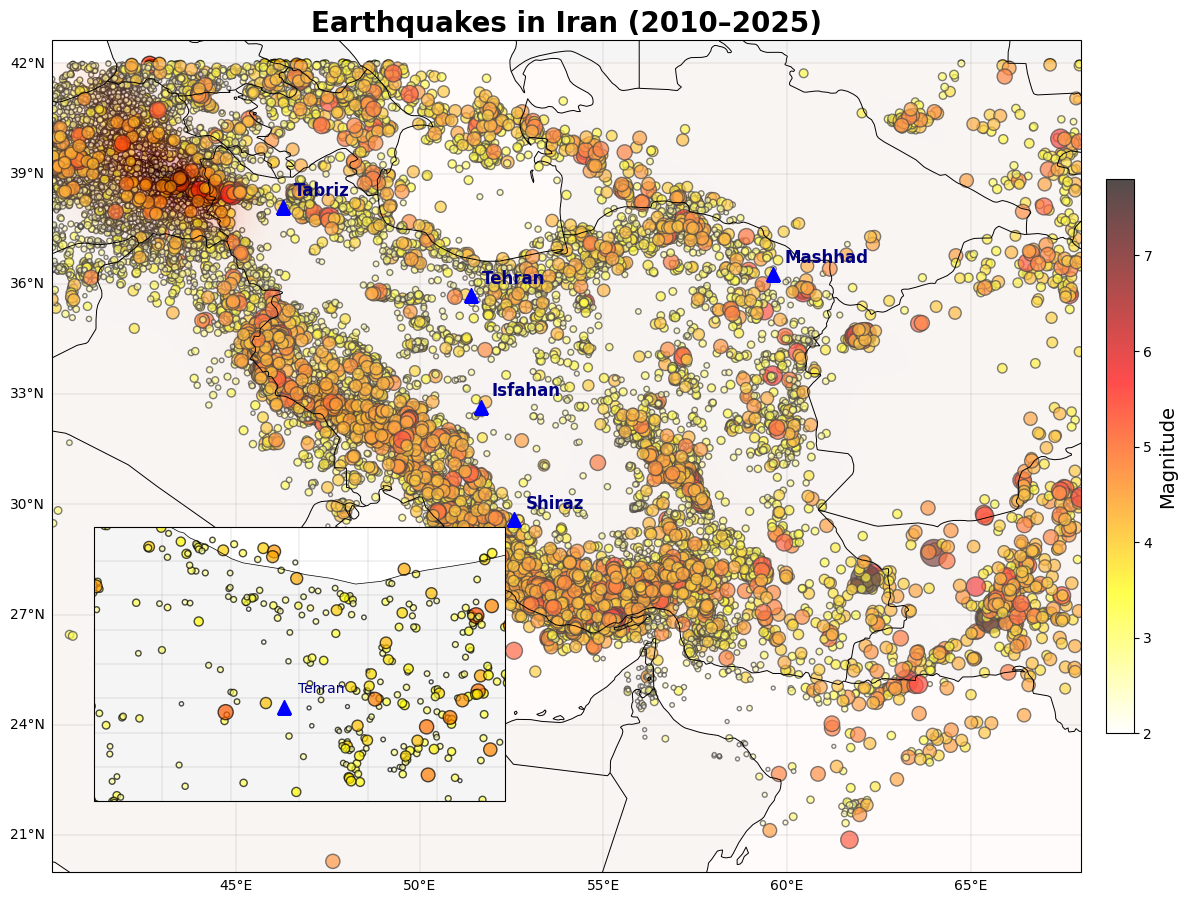

In [53]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Load your earthquake CSV (make sure it has 'latitude', 'longitude', 'magnitude' columns)
eq_df = pd.read_csv("iran_earthquakes.csv")
eq_df['time'] = pd.to_datetime(eq_df['time'])

# Iran bounding box
min_lat, max_lat = 20.0, 42.0
min_lon, max_lon = 40.0, 68.0

# Major cities (lat, lon)
cities = {
    'Tehran': (35.6892, 51.3890),
    'Mashhad': (36.2605, 59.6168),
    'Isfahan': (32.6546, 51.6680),
    'Shiraz': (29.5918, 52.5837),
    'Tabriz': (38.0962, 46.2738)
}

# Setup figure and main axis with PlateCarree projection
fig = plt.figure(figsize=(16, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([min_lon, max_lon, min_lat, max_lat])

# Add map features
ax.add_feature(cfeature.LAND, facecolor='whitesmoke')
ax.add_feature(cfeature.BORDERS, linewidth=0.7)
ax.add_feature(cfeature.COASTLINE, linewidth=0.7)
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,
                  linewidth=0.3, color='gray', alpha=0.5)
gl.top_labels = False
gl.right_labels = False

# 1. Earthquake scatter plot (size ~ magnitude^3)
sc = ax.scatter(
    eq_df['longitude'], eq_df['latitude'],
    c=eq_df['magnitude'], cmap='hot_r',
    s=eq_df['magnitude']**3, edgecolor='k', alpha=0.7,
    transform=ccrs.PlateCarree()
)

# 2. Density heatmap (using correct import and fix)
nbins = 300
k = gaussian_kde([eq_df['longitude'], eq_df['latitude']])
xi, yi = np.meshgrid(
    np.linspace(min_lon, max_lon, nbins),
    np.linspace(min_lat, max_lat, nbins)
)
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
ax.pcolormesh(
    xi, yi, zi.reshape(xi.shape),
    cmap='Reds', alpha=0.3,
    shading='auto',
    transform=ccrs.PlateCarree()
)

# 3. Plot major cities
for city, (lat, lon) in cities.items():
    ax.plot(lon, lat, marker='^', color='blue', markersize=10,
            transform=ccrs.PlateCarree(), zorder=5)
    ax.text(lon + 0.3, lat + 0.3, city,
            fontsize=12, fontweight='bold', color='navy',
            transform=ccrs.PlateCarree(), zorder=6)

# 4. Colorbar and title
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02, shrink=0.6)
cbar.set_label('Magnitude', fontsize=14)
plt.title('Earthquakes in Iran (2010–2025)', fontsize=20, weight='bold')

# 5. Zoomed inset near Tehran
# Create inset axis with Cartopy projection properly
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cartopy.mpl.geoaxes

# Use inset_axes with width and height in fraction, no loc param (avoid default axes)
inset_ax = inset_axes(ax, width="40%", height="40%", loc='lower left', borderpad=3, 
                      axes_class=cartopy.mpl.geoaxes.GeoAxes,
                      axes_kwargs=dict(map_projection=ccrs.PlateCarree()))

# Set extent of inset near Tehran
inset_ax.set_extent([50, 53, 35, 37], crs=ccrs.PlateCarree())

# Add features to inset
inset_ax.add_feature(cfeature.LAND, facecolor='whitesmoke')
inset_ax.add_feature(cfeature.BORDERS, linewidth=0.5)
inset_ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
inset_ax.gridlines(draw_labels=False, linewidth=0.3, color='gray', alpha=0.5)

# Plot earthquakes in inset
inset_ax.scatter(
    eq_df['longitude'], eq_df['latitude'],
    c=eq_df['magnitude'], cmap='hot_r',
    s=eq_df['magnitude']**3, edgecolor='k', alpha=0.7,
    transform=ccrs.PlateCarree()
)

# Highlight Tehran in inset
lat_tehran, lon_tehran = cities['Tehran']
inset_ax.plot(lon_tehran, lat_tehran, marker='^', color='blue', markersize=10, transform=ccrs.PlateCarree())
inset_ax.text(lon_tehran + 0.1, lat_tehran + 0.1, 'Tehran', fontsize=10, color='navy', transform=ccrs.PlateCarree())

plt.show()


**Frequency-Magnitude Distribution (FMD) Plot**

This plot illustrates the frequency-magnitude distribution, a fundamental relationship in seismology showing how earthquake frequency decreases exponentially as magnitude increases.

- The magnitudes of earthquakes are binned in intervals of 0.1 units.
- We calculate the number of earthquakes in each bin, then compute the cumulative count of events with magnitude greater than or equal to each bin (reverse cumulative sum).
- The y-axis uses a logarithmic scale to clearly show variations across a wide range of earthquake frequencies.
- Typically, the data follow the Gutenberg-Richter law, which predicts a straight line on this log plot.

This visualization helps us understand the overall distribution of earthquake sizes and their relative occurrence rates in Iran from 2010 to 2025.


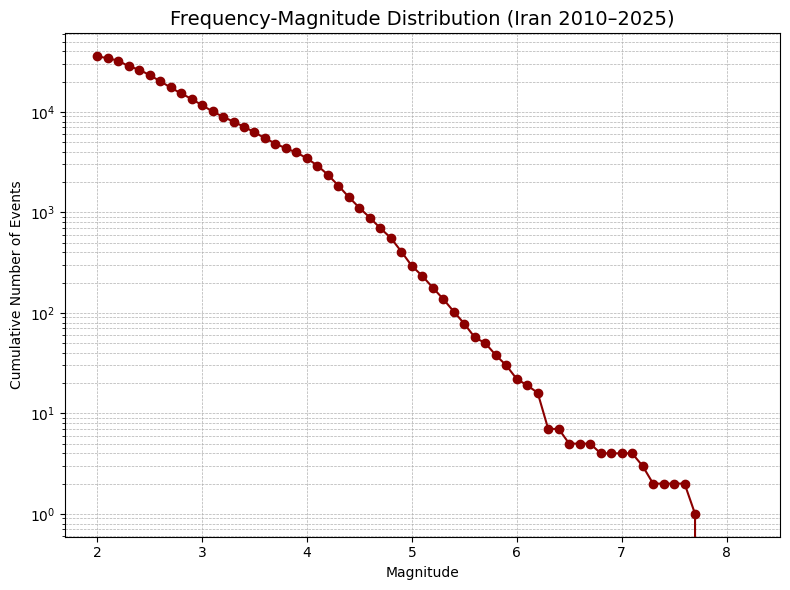

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
eq_df = pd.read_csv("iran_earthquakes.csv")
magnitudes = np.array(eq_df['magnitude'])

# Histogram bins
bins = np.arange(2.0, max(magnitudes) + 0.5, 0.1)
hist, bin_edges = np.histogram(magnitudes, bins=bins)

# Cumulative counts (reversed for descending magnitude)
cum_counts = np.cumsum(hist[::-1])[::-1]

# Plot
plt.figure(figsize=(8, 6))
plt.plot(bin_edges[:-1], cum_counts, marker='o', linestyle='-', color='darkred')
plt.yscale('log')
plt.xlabel('Magnitude')
plt.ylabel('Cumulative Number of Events')
plt.title('Frequency-Magnitude Distribution (Iran 2010–2025)', fontsize=14)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


**Histogram of Earthquake Magnitudes**

This histogram displays the distribution of earthquake magnitudes recorded in Iran during 2010–2025.

- The magnitude range is divided into 20 bins.
- Each bar represents the number of earthquakes falling within a specific magnitude interval.
- The histogram provides a straightforward visualization of how often smaller versus larger earthquakes occur.
- The plot helps identify the most common earthquake sizes and supports further statistical analysis.


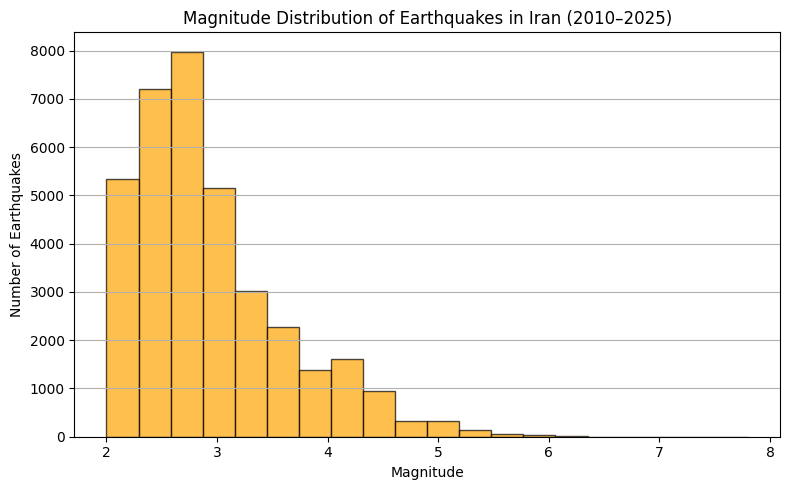

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Load earthquake data
eq_df = pd.read_csv("iran_earthquakes.csv")

plt.figure(figsize=(8, 5))
plt.hist(eq_df['magnitude'], bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel('Magnitude')
plt.ylabel('Number of Earthquakes')
plt.title('Magnitude Distribution of Earthquakes in Iran (2010–2025)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Annual Earthquake Frequency**

This bar chart shows the number of earthquakes recorded each year in Iran between 2010 and 2025.

- Earthquake occurrence times are converted to years.
- Events are grouped by year to count the total earthquakes per year.
- The bar heights indicate annual seismic activity levels.
- This temporal trend analysis can reveal periods of increased or decreased earthquake activity.
- It also helps monitor seismicity changes over time, which can be linked to tectonic or anthropogenic factors.

Understanding yearly trends supports long-term seismic hazard assessment and preparedness planning.


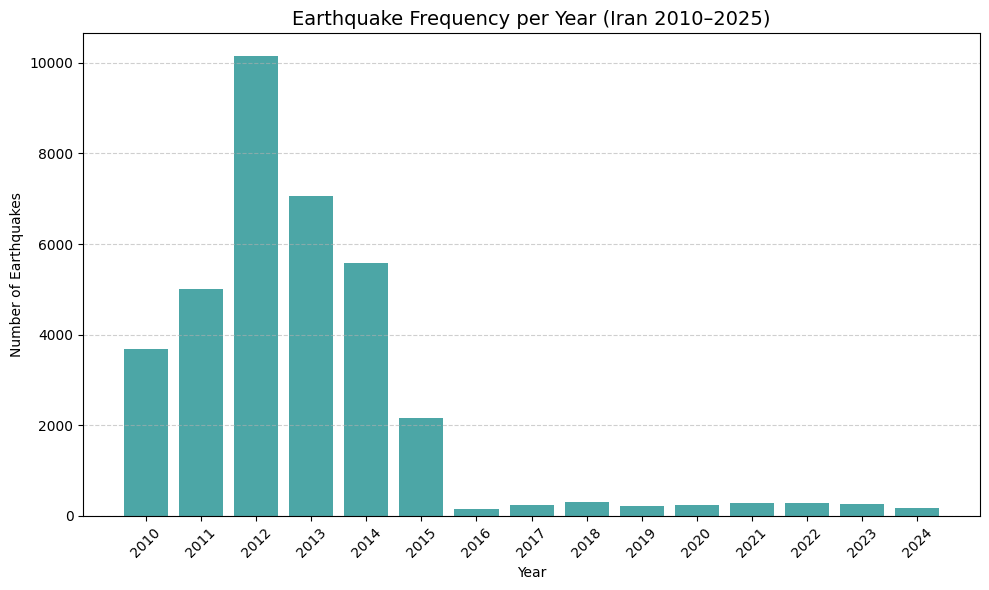

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
eq_df = pd.read_csv("iran_earthquakes.csv")
eq_df['time'] = pd.to_datetime(eq_df['time'])
eq_df['Year'] = eq_df['time'].dt.year

# Group by year
yearly_counts = eq_df.groupby('Year').size().reset_index(name='Count')

# Plot
plt.figure(figsize=(10, 6))
plt.bar(yearly_counts['Year'], yearly_counts['Count'], color='teal', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Earthquake Frequency per Year (Iran 2010–2025)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(yearly_counts['Year'], rotation=45)
plt.tight_layout()
plt.show()


**Spectrogram of Earthquake Magnitudes**

This spectrogram visualizes the frequency content of earthquake magnitudes over the sequence of events recorded in Iran from 2010 to 2025.

- The earthquake magnitudes are treated as a discrete time series, ordered chronologically by event time.
- Using a spectrogram, we analyze how the frequency components of magnitude variations change throughout the dataset.
- The x-axis represents the event index (time progression), while the y-axis shows frequency in Hertz.
- The color intensity indicates the strength of frequency components at each point, revealing any repeating patterns or periodicities in magnitude fluctuations.
- Although seismic events are irregular in time, this analysis can highlight underlying temporal structures or clusters in seismicity.

This approach complements traditional earthquake frequency and magnitude analyses by exploring the temporal frequency dynamics of seismic activity.


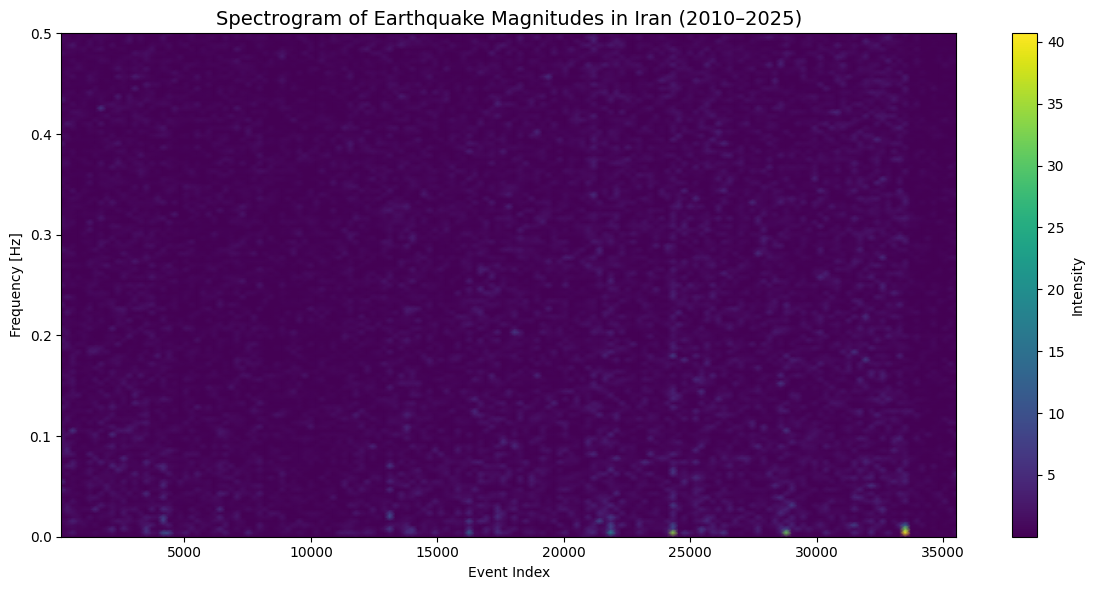

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Load CSV
df = pd.read_csv("iran_earthquakes.csv")
df['time'] = pd.to_datetime(df['time'])

# Sort by time
df_sorted = df.sort_values('time')
times = np.arange(len(df_sorted))
magnitudes = df_sorted['magnitude'].values

# Generate spectrogram
f, t, Sxx = signal.spectrogram(magnitudes, fs=1)  # fs=1 since it's discrete events

# Plot
plt.figure(figsize=(12, 6))
plt.pcolormesh(t, f, Sxx, shading='gouraud', cmap='viridis')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Event Index')
plt.title('Spectrogram of Earthquake Magnitudes in Iran (2010–2025)', fontsize=14)
plt.colorbar(label='Intensity')
plt.tight_layout()
plt.show()


**Rose Diagram of Earthquake Azimuths Relative to Central Iran**

This analysis visualizes the directional distribution (azimuths) of earthquake epicenters relative to a reference point located near central Iran (latitude 32.0°, longitude 53.0°).

- **Azimuth Calculation:**  
  For each earthquake, the azimuth (or bearing) is computed as the angle between the reference point and the earthquake location, measured clockwise from North (0° to 360°). This shows the general directions where seismic events occur relative to the reference.

- **Full Dataset Rose Diagram:**  
  The first rose diagram plots azimuths of all recorded earthquakes in the dataset, providing a broad overview of seismic directions across the entire region.

- **Zoomed Rose Diagram (within 300 km):**  
  To focus on local seismicity, the second diagram filters earthquakes occurring within a 300 km radius of the reference point. This zoomed-in view highlights directional trends of nearby seismic events, potentially related to local fault systems or tectonic features.

- **Visualization Details:**  
  Both diagrams use 10° bins to aggregate azimuth counts, plotted in a circular histogram (rose diagram). The zero angle is set to North, and the plot is oriented clockwise, making interpretation intuitive relative to geographic directions.

These rose diagrams help identify preferred seismic source directions and can assist in understanding regional tectonic stress orientations and seismic hazard patterns.


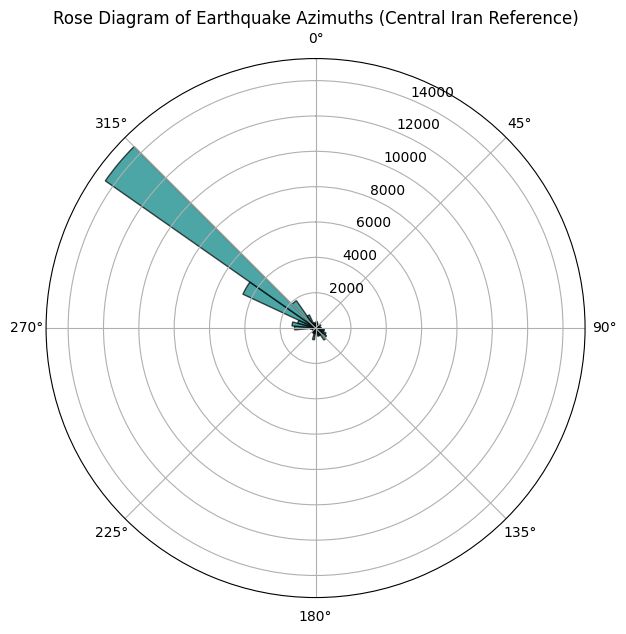

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load earthquake data
eq_df = pd.read_csv("iran_earthquakes.csv")

# Reference point (change to your area of interest if needed)
ref_lat, ref_lon = 32.0, 53.0  # roughly central Iran

def calculate_azimuth(lat1, lon1, lat2, lon2):
    """Calculate azimuth (bearing) between two lat/lon points."""
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    d_lon = lon2 - lon1
    x = np.sin(d_lon) * np.cos(lat2)
    y = np.cos(lat1)*np.sin(lat2) - np.sin(lat1)*np.cos(lat2)*np.cos(d_lon)
    azimuth = np.arctan2(x, y)
    return np.degrees(azimuth) % 360

# Compute azimuths
eq_df['Azimuth'] = eq_df.apply(
    lambda row: calculate_azimuth(ref_lat, ref_lon, row['latitude'], row['longitude']), 
    axis=1
)

# Convert to radians for plotting
angles = np.deg2rad(eq_df['Azimuth'].dropna())

# Rose diagram parameters
num_bins = 36  # 10° bins
counts, bin_edges = np.histogram(angles, bins=num_bins, range=(0, 2*np.pi))
width = 2 * np.pi / num_bins

# Plot rose diagram
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, polar=True)

bars = ax.bar(bin_edges[:-1], counts, width=width, bottom=0.0, color='teal', alpha=0.7, edgecolor='black')

ax.set_theta_zero_location('N')  # zero at North
ax.set_theta_direction(-1)       # clockwise
ax.set_title('Rose Diagram of Earthquake Azimuths (Central Iran Reference)')

plt.show()


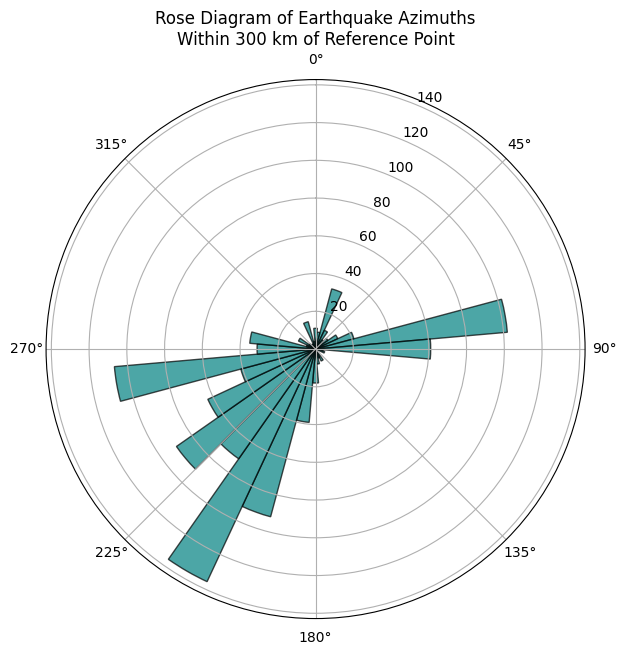

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load earthquake data
eq_df = pd.read_csv("iran_earthquakes.csv")

# Reference point (central Iran)
ref_lat, ref_lon = 32.0, 53.0

# Haversine formula to calculate great-circle distance between two points (in km)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Calculate distance from reference point
eq_df['Distance_km'] = eq_df.apply(lambda row: haversine(ref_lat, ref_lon, row['latitude'], row['longitude']), axis=1)

# Filter earthquakes within 300 km radius (zoom)
zoom_radius_km = 300
zoom_df = eq_df[eq_df['Distance_km'] <= zoom_radius_km].copy()

# Calculate azimuth only for zoomed data
def calculate_azimuth(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    d_lon = lon2 - lon1
    x = np.sin(d_lon) * np.cos(lat2)
    y = np.cos(lat1)*np.sin(lat2) - np.sin(lat1)*np.cos(lat2)*np.cos(d_lon)
    azimuth = np.arctan2(x, y)
    return np.degrees(azimuth) % 360

zoom_df['Azimuth'] = zoom_df.apply(lambda row: calculate_azimuth(ref_lat, ref_lon, row['latitude'], row['longitude']), axis=1)

angles = np.deg2rad(zoom_df['Azimuth'].dropna())

# Rose diagram parameters
num_bins = 36  # 10° bins
counts, bin_edges = np.histogram(angles, bins=num_bins, range=(0, 2*np.pi))
width = 2 * np.pi / num_bins

# Plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, polar=True)

bars = ax.bar(bin_edges[:-1], counts, width=width, bottom=0.0, color='teal', alpha=0.7, edgecolor='black')

ax.set_theta_zero_location('N')  # zero at North
ax.set_theta_direction(-1)       # clockwise
ax.set_title(f'Rose Diagram of Earthquake Azimuths\nWithin {zoom_radius_km} km of Reference Point')

plt.show()



## Conclusions

* **Regional Seismic Activity:**
  The spatial distribution of earthquakes clearly highlights the dominance of major tectonic zones in Iran, particularly the Zagros fold-and-thrust belt in the southwest and the Alborz mountain range in the north. These regions exhibit persistent seismicity due to the ongoing convergence of the Arabian and Eurasian plates, which generates complex fault systems and significant crustal deformation. The clustering of events along these belts underscores their critical role in shaping Iran’s seismic hazard landscape.

* **Magnitude Distribution:**
  The frequency-magnitude relationship of the seismic events closely follows the classic Gutenberg–Richter law, characterized by an exponential decrease in the number of earthquakes with increasing magnitude. This implies that smaller magnitude earthquakes are far more frequent than larger ones, which aligns with global seismic observations. This distribution is essential for probabilistic seismic hazard assessments, as it helps estimate the likelihood of potentially damaging large earthquakes based on observed smaller events.

* **Temporal Patterns:**
  Analysis of earthquake occurrences over time reveals variability in seismic activity, including years with elevated event counts corresponding to significant earthquakes, such as the notable 2017 Kermanshah earthquake. These temporal fluctuations may reflect stress accumulation and release cycles within active fault zones. Understanding these temporal trends can improve earthquake forecasting models and inform emergency response planning by identifying periods of heightened seismic risk.

* **Implications for Seismic Hazard and Preparedness:**
  Given Iran’s position within an active continental collision zone and the observed seismic patterns, continuous seismic monitoring and detailed analyses are crucial. These efforts support risk mitigation by informing building codes, land-use planning, and public awareness campaigns aimed at reducing earthquake-related losses. The integration of seismic data with geological and geodetic information will further enhance hazard models and resilience strategies.

In summary, the comprehensive analysis of seismicity from 2010 to 2025 confirms that Iran remains one of the world’s most seismically active regions. Continued research and monitoring efforts are vital to safeguard communities and infrastructure against future earthquake impacts.




Mahdi Farmahinifarahani <br>
Kharazmi University <br>
aradfarahani@aol.com <br>